In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 625s 4us/step 


In [ ]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10) 

In [11]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2) 


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3943 - loss: 1.6498 - val_accuracy: 0.5019 - val_loss: 1.3793
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5340 - loss: 1.3009 - val_accuracy: 0.5683 - val_loss: 1.2161
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5915 - loss: 1.1503 - val_accuracy: 0.5996 - val_loss: 1.1404
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6277 - loss: 1.0535 - val_accuracy: 0.6225 - val_loss: 1.0638
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6569 - loss: 0.9851 - val_accuracy: 0.6449 - val_loss: 1.0193
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6806 - loss: 0.9192 - val_accuracy: 0.6585 - val_loss: 0.9805
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6965 - loss: 0.8668 - val_accuracy: 0.6774 - val_loss: 0.9292
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7138 - loss: 0.8185 - val_accuracy: 0.

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
index = int(input("Enter an index (0 to 9999) for test image: ")) 
if index < 0 or index >= len(x_test): 
    print("Invalid index. Using index 0 by default.") 
    index = 0


Enter an index (0 to 9999) for test image:  100


In [16]:
test_image = x_test[index] 
true_label = np.argmax(y_test[index])

In [17]:
prediction = model.predict(np.expand_dims(test_image, axis=0)) 
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


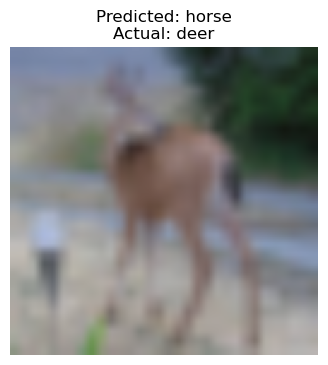

In [18]:
plt.figure(figsize=(4, 4)) 
resized_image = tf.image.resize(test_image, [128, 128])  
plt.imshow(resized_image) 
plt.axis('off') 
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}") 
plt.show()